Check connected Google GPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12927177421646866110
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 14644581727485526873
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

Connect google drive and install detecto

In [ ]:
import os
from google.colab import drive

os.chdir('/content/drive/MyDrive/Dice Reader')

In [ ]:
!ls

 d6d8d10d12_images_dataset_1   model_d6_dots_transforms.pth
 d6_images_dataset	       model_d6_my.pth
'Dice Reader demo.ipynb'       model_d6_my_v2.pth
 dice_reader.ipynb	       model_d6.pth
 dice_reader.ui		       model_demo2.pth
'Dice reader v2.ipynb'	       model_demo.pth
 GUI.py			      'notes data sets.txt'
 images1		       notes.txt
 images2		       test.csv
 images3		       timers.txt
 images4		       train.csv
 model_d6_dots.pth


In [ ]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


D6 dice Faster R-CNN ResNet-50 FPN

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

Create datasets, loader, model with labels

In [ ]:
train_dataset = core.Dataset('d6_images_dataset/train')
test_dataset = core.Dataset('d6_images_dataset/test')
loader = core.DataLoader(train_dataset, batch_size=1, shuffle=True)
model = core.Model(['one', 'two', 'three', 'four', 'five', 'six'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [ ]:
train_dataset = core.Dataset('d6_images_dataset/train')
test_dataset = core.Dataset('d6_images_dataset/test')
loader = core.DataLoader(train_dataset, batch_size=1, shuffle=True)
model = core.Model(['one', 'two', 'three', 'four', 'five', 'six'])
losses = model.fit(loader, test_dataset, epochs=10, verbose=True)

Check image

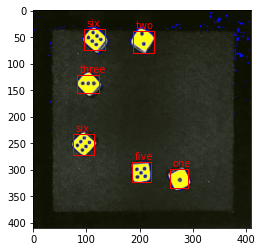

['one', 'two', 'three', 'five', 'six', 'six']


In [ ]:
image, target = train_dataset[0]
visualize.show_labeled_image(image, target['boxes'], target['labels'])
print(target['labels'])

Train the model

In [ ]:
losses = model.fit(loader, test_dataset, epochs=10, verbose=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:53<00:00,  1.13it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:34<00:00,  1.36s/it]


Loss: 0.5784531059861183
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:56<00:00,  1.10it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:19<00:00,  1.30it/s]


Loss: 0.5886838781833649
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [02:00<00:00,  1.06it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:19<00:00,  1.27it/s]


Loss: 0.3960724806785583
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:47<00:00,  1.19it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.36it/s]


Loss: 0.2526277238130569
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:45<00:00,  1.21it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.34it/s]


Loss: 0.24503806471824646
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:46<00:00,  1.20it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.37it/s]


Loss: 0.2338131134212017
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:45<00:00,  1.21it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.38it/s]


Loss: 0.219518903195858
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:45<00:00,  1.21it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.36it/s]


Loss: 0.21424056351184845
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:45<00:00,  1.22it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.38it/s]


Loss: 0.21261119559407235
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:44<00:00,  1.22it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.38it/s]

Loss: 0.21723766550421714


Plot accuracy

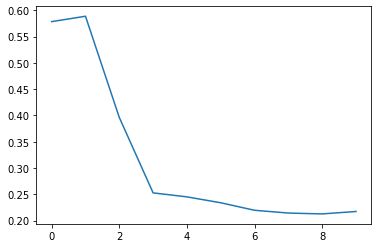

[0.5784531059861183, 0.5886838781833649, 0.3960724806785583, 0.2526277238130569, 0.24503806471824646, 0.2338131134212017, 0.219518903195858, 0.21424056351184845, 0.21261119559407235, 0.21723766550421714]


In [ ]:
plt.plot(losses)
plt.show()
print(losses)

Test on some images

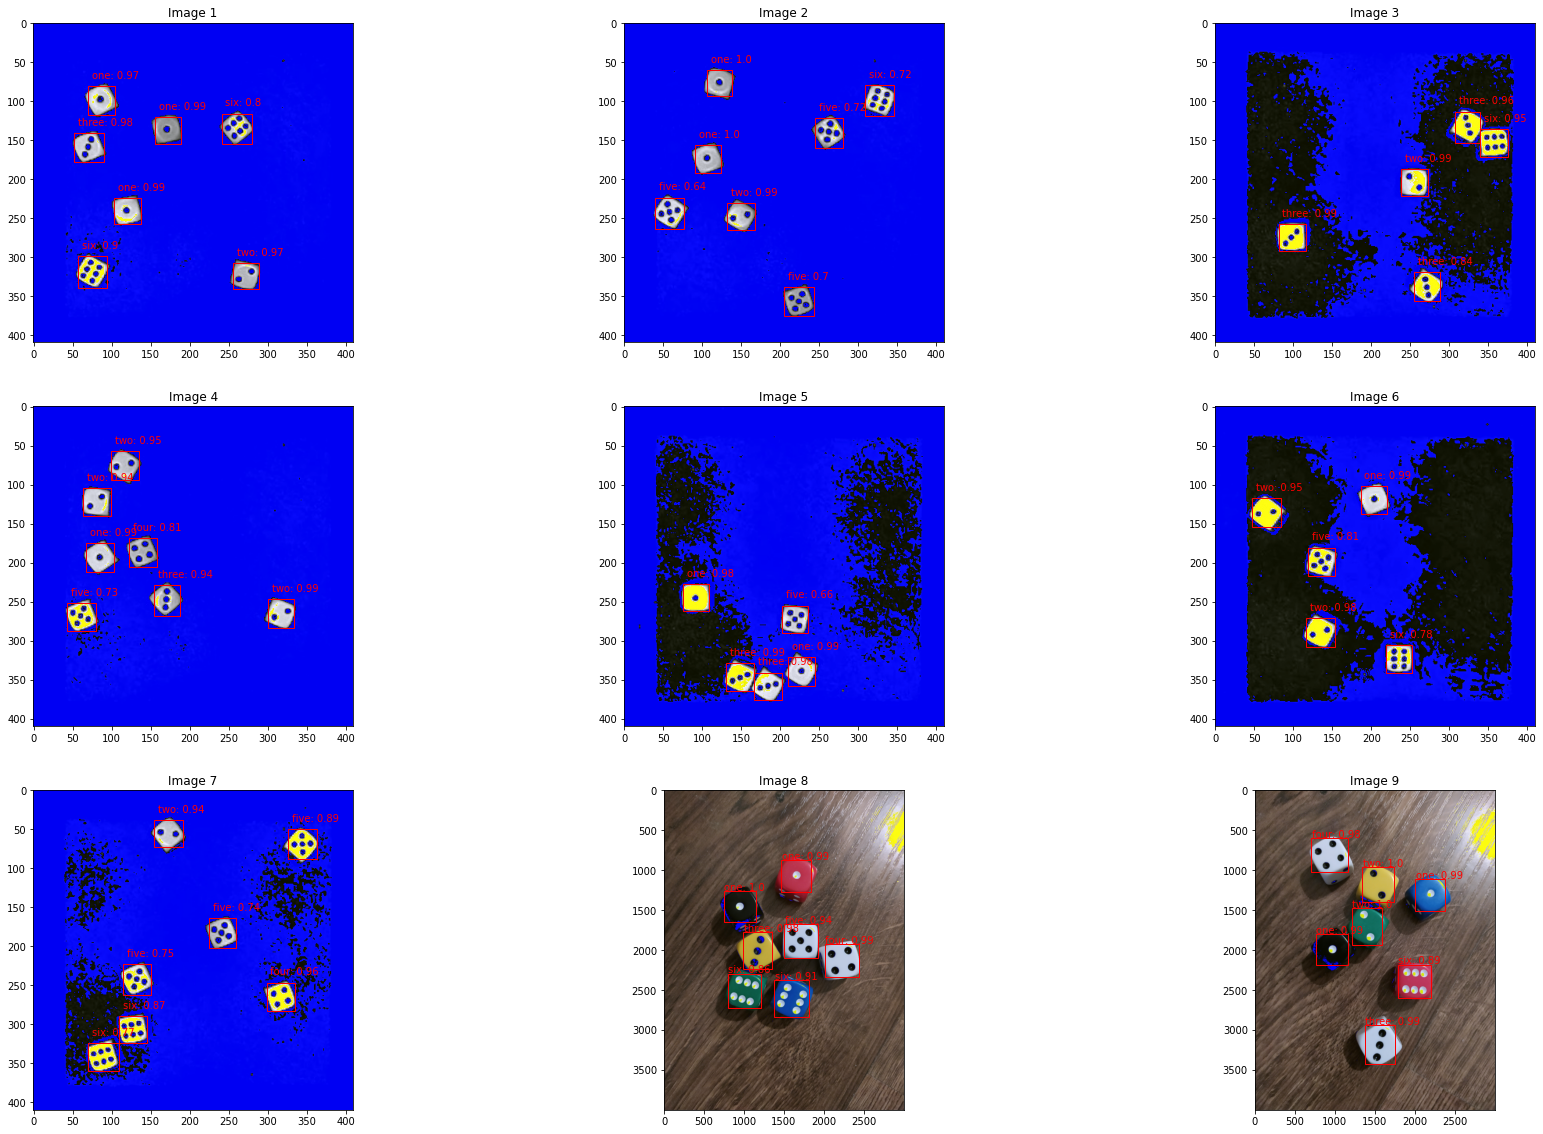

In [ ]:
images = []
for i in range(0,9):
    image, _ = test_dataset[i]
    images.append(image)
visualize.plot_prediction_grid(model, images, dim=(3,3), figsize=(30, 20))

Save model

In [ ]:
model.save('model_d6_dots.pth')

D6 dice Faster R-CNN ResNet-50 FPN with transformations

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

Add transformations

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

Create datasets, loader, model with labels

In [ ]:
train_dataset = core.Dataset('d6_images_dataset/train', transform=transformations)
test_dataset = core.Dataset('d6_images_dataset/test')
loader = core.DataLoader(train_dataset, batch_size=1, shuffle=True)
model = core.Model(['one', 'two', 'three', 'four', 'five', 'six'])

Check image

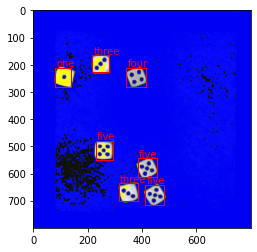

In [ ]:
image, target = train_dataset[1]
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Train the model

In [ ]:
losses = model.fit(loader, test_dataset, epochs=10, verbose=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.34it/s]


Loss: 0.6540161979198456
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:39<00:00,  1.29it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]


Loss: 0.6302444067597389
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]


Loss: 0.42012137711048125
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]


Loss: 0.27507704704999925
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]


Loss: 0.2553863546252251
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]


Loss: 0.2433757871389389
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.36it/s]


Loss: 0.23105621635913848
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.36it/s]


Loss: 0.2294733139872551
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]


Loss: 0.2250908535718918
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 128/128 [01:38<00:00,  1.30it/s]


Begin iterating over validation dataset


100%|██████████| 25/25 [00:18<00:00,  1.35it/s]

Loss: 0.22547633022069932


Plot accuracy

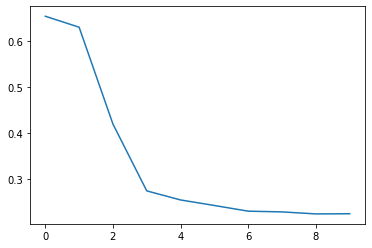

[0.6540161979198456, 0.6302444067597389, 0.42012137711048125, 0.27507704704999925, 0.2553863546252251, 0.2433757871389389, 0.23105621635913848, 0.2294733139872551, 0.2250908535718918, 0.22547633022069932]


In [ ]:
plt.plot(losses)
plt.show()
print(losses)

Test on some images

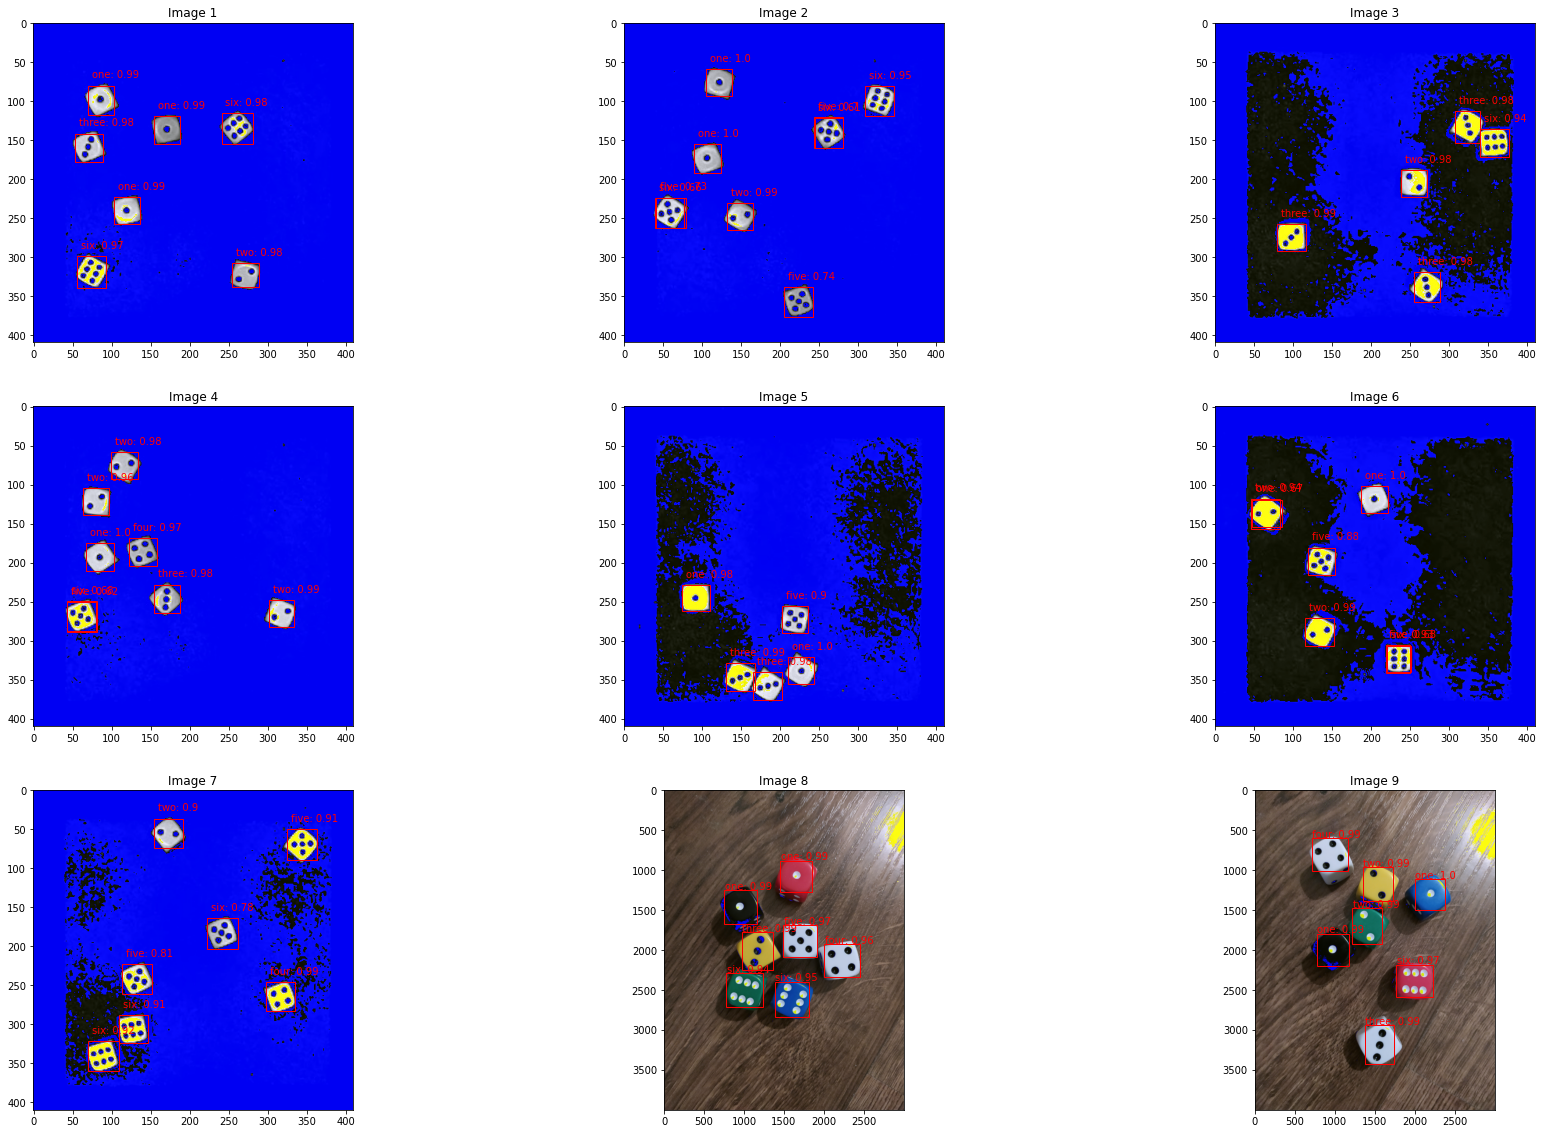

In [ ]:
images = []
for i in range(0,9):
    image, _ = test_dataset[i]
    images.append(image)
visualize.plot_prediction_grid(model, images, dim=(3,3), figsize=(30, 20))

Save model

In [ ]:
model.save('model_d6_dots_transforms.pth')

D6 D8 D10 D12 dice Faster R-CNN ResNet-50 FPN

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

Create datasets, loader, model with labels

In [ ]:
train_dataset = core.Dataset('d6d8d10d12_images_dataset_1/train')
test_dataset = core.Dataset('d6d8d10d12_images_dataset_1/test')
loader = core.DataLoader(train_dataset, batch_size=1, shuffle=True)
model = core.Model(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve'])

Check image

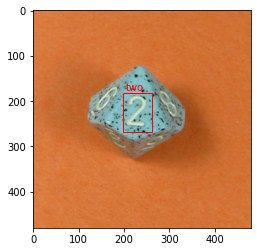

In [ ]:
image, target = train_dataset[0]
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Train the model

In [ ]:
losses = model.fit(loader, test_dataset, epochs=10, verbose=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:29<00:00,  3.00it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:33<00:00,  4.04it/s]


Loss: 0.4666078023831634
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:27<00:00,  3.01it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.50it/s]


Loss: 0.40930461039876237
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:28<00:00,  3.01it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.49it/s]


Loss: 0.3765769263948588
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:27<00:00,  3.02it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.46it/s]


Loss: 0.28835789503200965
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:27<00:00,  3.02it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.44it/s]


Loss: 0.2763572719276828
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:27<00:00,  3.03it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:29<00:00,  4.55it/s]


Loss: 0.26834083792260466
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:26<00:00,  3.03it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.48it/s]


Loss: 0.2645566348972566
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:27<00:00,  3.02it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.45it/s]


Loss: 0.26689792514833455
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:27<00:00,  3.03it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.51it/s]


Loss: 0.2664644548888592
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:25<00:00,  3.05it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:29<00:00,  4.54it/s]

Loss: 0.2665061403394622


Plot accuracy

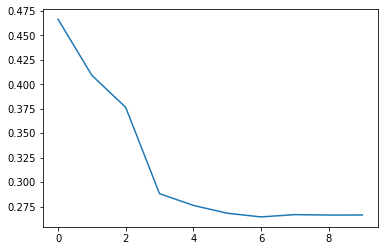

[0.4666078023831634, 0.40930461039876237, 0.3765769263948588, 0.28835789503200965, 0.2763572719276828, 0.26834083792260466, 0.2645566348972566, 0.26689792514833455, 0.2664644548888592, 0.2665061403394622]


In [ ]:
plt.plot(losses)
plt.show()
print(losses)

Test on some images

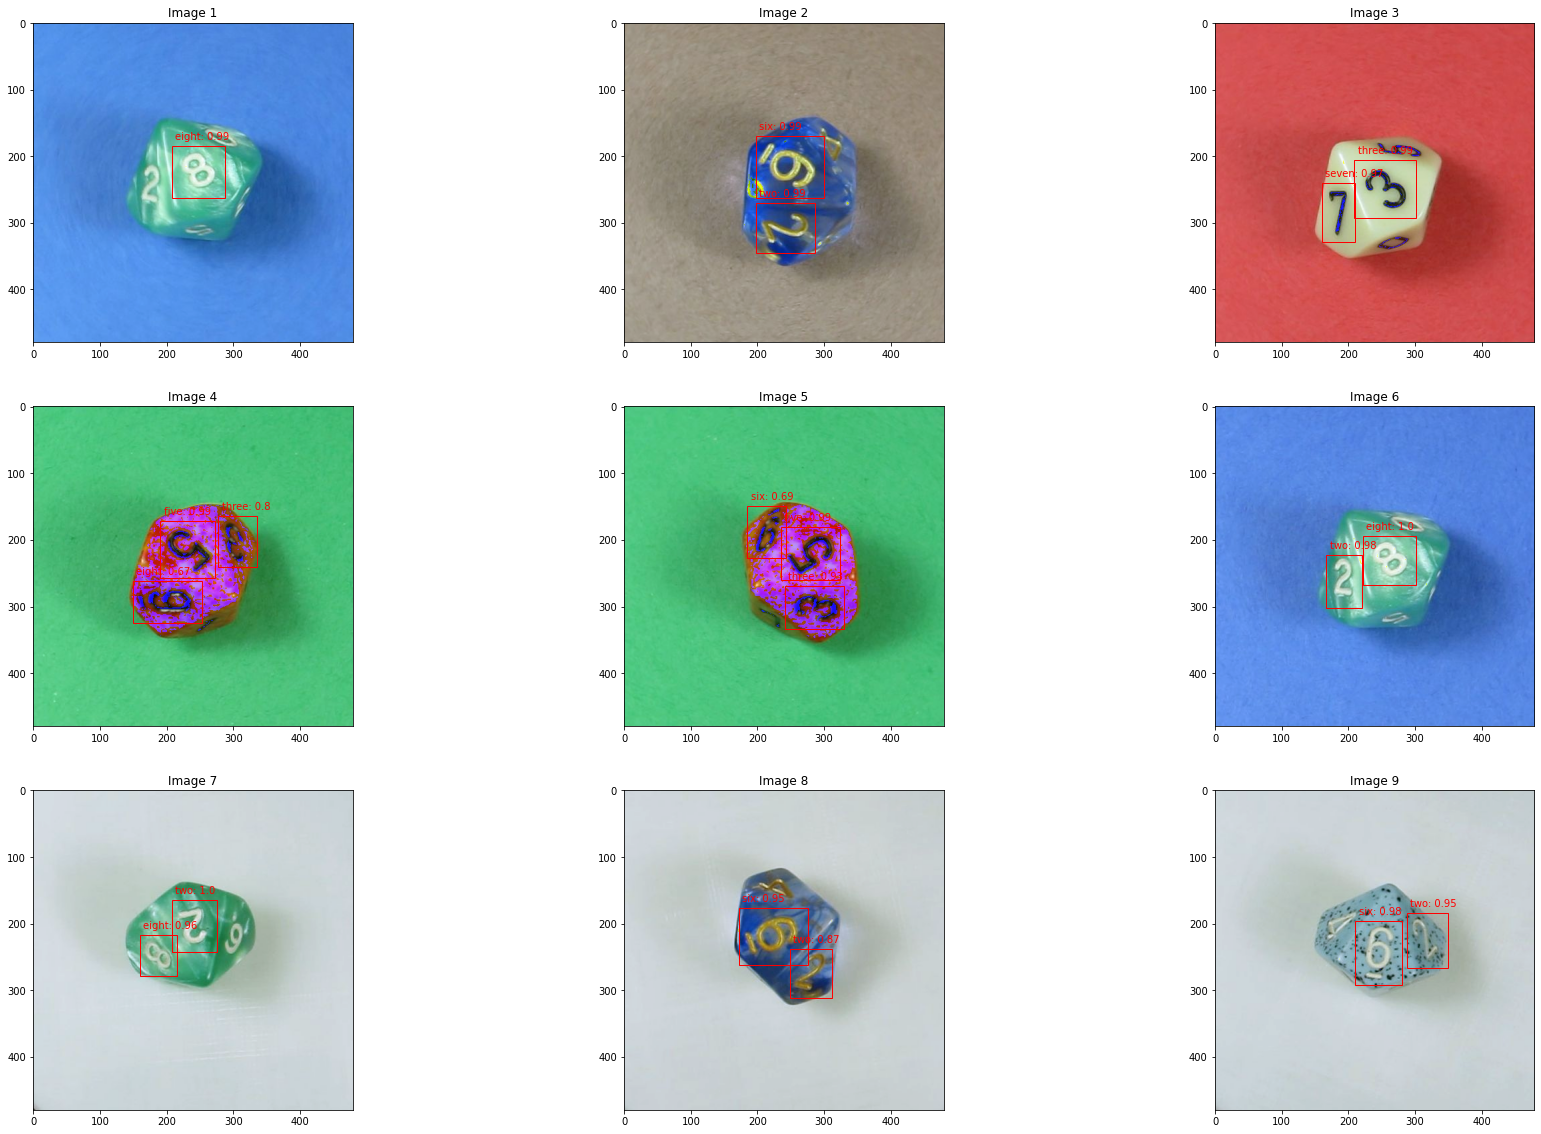

In [ ]:
images = []
for i in range(0,9):
    image, _ = test_dataset[i]
    images.append(image)
visualize.plot_prediction_grid(model, images, dim=(3,3), figsize=(30, 20))

Save model

In [ ]:
model.save('model_d6d8d10d12.pth')

D6 D8 D10 D12 dice Faster R-CNN ResNet-50 FPN with transformations

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

Add transformations

In [ ]:
transformations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

Create datasets, loader, model with labels

In [ ]:
train_dataset = core.Dataset('d6d8d10d12_images_dataset_1/train', transform=transformations)
test_dataset = core.Dataset('d6d8d10d12_images_dataset_1/test')
loader = core.DataLoader(train_dataset, batch_size=1, shuffle=True)
model = core.Model(['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve'])

Check image

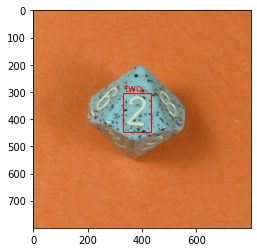

In [ ]:
image, target = train_dataset[0]
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Train the model

In [ ]:
losses = model.fit(loader, test_dataset, epochs=10, verbose=True)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:12<00:00,  3.25it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.44it/s]


Loss: 0.35711292045957904
Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:12<00:00,  3.25it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.39it/s]


Loss: 0.3140495146679528
Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:12<00:00,  3.25it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.42it/s]


Loss: 0.27443042912465687
Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:13<00:00,  3.24it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.47it/s]


Loss: 0.23675620216218865
Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:13<00:00,  3.24it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.43it/s]


Loss: 0.23135936290354414
Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:13<00:00,  3.25it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.45it/s]


Loss: 0.22642312576884732
Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:12<00:00,  3.26it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.51it/s]


Loss: 0.2197536215021768
Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:13<00:00,  3.24it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.49it/s]


Loss: 0.22194677109227462
Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:14<00:00,  3.22it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.44it/s]


Loss: 0.22138581112684572
Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 627/627 [03:12<00:00,  3.26it/s]


Begin iterating over validation dataset


100%|██████████| 136/136 [00:30<00:00,  4.50it/s]

Loss: 0.22169539028340401


Plot accuracy

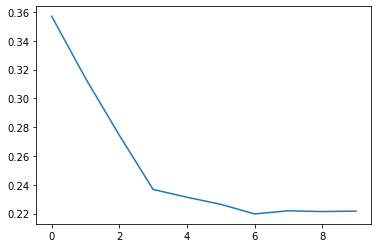

[0.35711292045957904, 0.3140495146679528, 0.27443042912465687, 0.23675620216218865, 0.23135936290354414, 0.22642312576884732, 0.2197536215021768, 0.22194677109227462, 0.22138581112684572, 0.22169539028340401]


In [ ]:
plt.plot(losses)
plt.show()
print(losses)

Test on some images

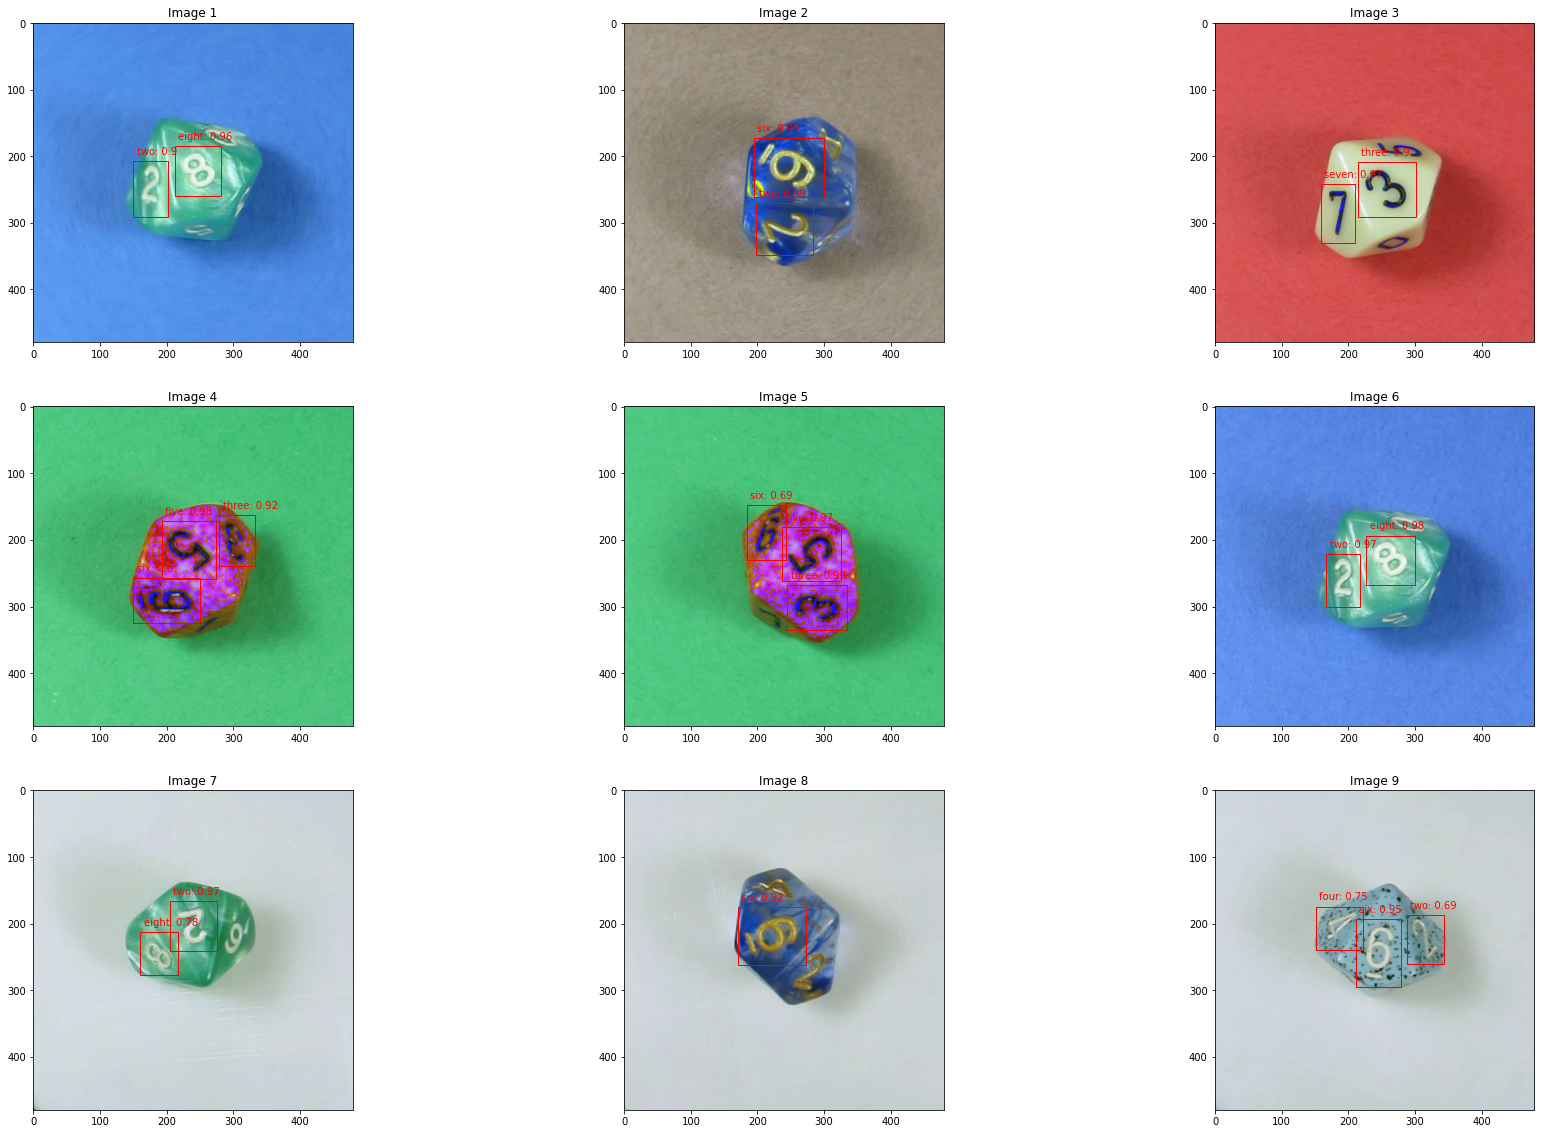

In [ ]:
images = []
for i in range(0,9):
    image, _ = test_dataset[i]
    images.append(image)
visualize.plot_prediction_grid(model, images, dim=(3,3), figsize=(30, 20))

Save model

In [ ]:
model.save('model_d6d8d10d12_transforms.pth')